In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline_passengers.csv to airline_passengers (1).csv


In [ ]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['airline_passengers.csv']))

In [ ]:
df2

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


1.cheak data for stationary data (hypothesis test which is dickeyfullr test)
H0 = unit root = 1 ==> data is not stationary
H1 = unit root < 1 ==> data is stationary
 conditions for stationary data
 *Mean should be constant
 *sdt should be constant
 dickeyfuller test gives P value if P < 0.5 then null hypothesis gets rejected
 if P >= 0.5 then null hypothesis gets accepted

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df2.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df2.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
df2.dropna(inplace = True)

In [ ]:
df2.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
#from datetime import datetime
df2['Month'] = pd.to_datetime(df2['Month'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
df2.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
df2.set_index('Month', inplace = True)

In [ ]:
df2.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


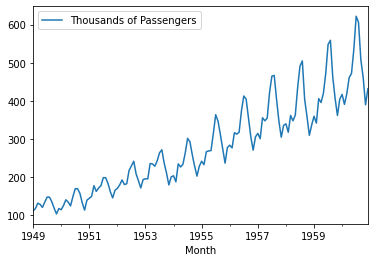

In [ ]:
df2.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print('ADF statistics : {}'. format(result[0]))
  print('p-value : {}'.format(result[1]))
  if result[1] <= 0.05:
    print('reject null hypothesis and data is stationary')
  else:
    print('weak evidence of null hypothesis and data is not stationary')

In [ ]:
adf_test(df2['Thousands of Passengers'])

ADF statistics : 0.8153688792060472
p-value : 0.991880243437641
weak evidence of null hypothesis and data is not stationary


In [ ]:
df2['Passengers First Difference'] = df2['Thousands of Passengers'] - df2['Thousands of Passengers'].shift(1) 

In [ ]:
df2

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [ ]:
adf_test(df2['Passengers First Difference'].dropna())

ADF statistics : -2.8292668241700056
p-value : 0.054213290283824704
weak evidence of null hypothesis and data is not stationary


In [ ]:
df2['Passengers Second Difference'] = df2['Passengers First Difference'] - df2['Passengers First Difference'].shift(1) 

In [ ]:
adf_test(df2['Passengers Second Difference'].dropna())

ADF statistics : -16.384231542468495
p-value : 2.7328918500143186e-29
reject null hypothesis and data is stationary


In [ ]:
df2['Passengers 12 Difference'] = df2['Thousands of Passengers'] - df2['Thousands of Passengers'].shift(12) 

In [ ]:
adf_test(df2['Passengers 12 Difference'].dropna())

ADF statistics : -3.383020726492481
p-value : 0.011551493085514952
reject null hypothesis and data is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

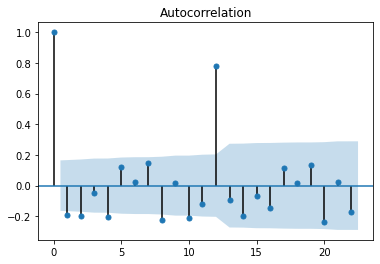

In [ ]:
acf = plot_acf(df2['Passengers Second Difference'].dropna())

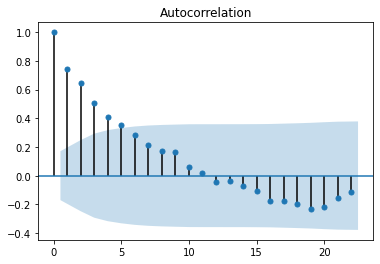

In [ ]:
acf12 = plot_acf(df2['Passengers 12 Difference'].dropna())
pacf12 = plot_pacf(df2['Passengers 12 Difference'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


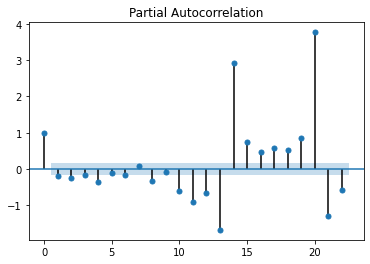

In [ ]:
pacf = plot_pacf(df2['Passengers Second Difference'].dropna())

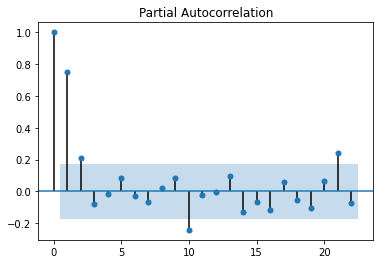

In [ ]:
pacf12 = plot_pacf(df2['Passengers 12 Difference'].dropna())

I consider P = 2 or P = 10 and q = 5 based on PACF and ACF graphs respectively

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [ ]:
train_data = df2[:train_dataset_end]
test_data = df2[train_dataset_end+timedelta(days = 1):test_dataset_end]

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [ ]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [ ]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order = (10,2,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_ARIMA_fit = model_ARIMA.fit()

In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Tue, 02 Aug 2022   AIC                            738.477
Time:                                04:23:10   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.963      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.001      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.028      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.013      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [ ]:
pred = model_ARIMA_fit.predict(start = pred_start_date, end = pred_end_date)
reduals = test_data['Thousands of Passengers'] - pred

In [ ]:
import numpy as np

In [ ]:
mape = (np.mean(np.abs(pred - test_data['Thousands of Passengers'])/np.abs(test_data['Thousands of Passengers']))*100).round(2)
rmse = np.sqrt(((pred - test_data['Thousands of Passengers']) ** 2).mean())

print(mape)
print(rmse)

100.08
405.4816908287309


In [ ]:
reduals

Month
1956-01-01    302.695968
1956-02-01    289.830814
1956-03-01    319.329670
1956-04-01    328.562175
1956-05-01    298.689307
1956-06-01    354.352062
1956-07-01    426.271470
1956-08-01    441.529638
1956-09-01    350.001340
1956-10-01    315.913214
1956-11-01    242.711491
1956-12-01    281.647790
1957-01-01    333.119981
1957-02-01    304.741485
1957-03-01    367.652378
1957-04-01    343.198158
1957-05-01    343.325720
1957-06-01    413.019341
1957-07-01    483.932109
1957-08-01    477.557322
1957-09-01    403.265275
1957-10-01    346.226362
1957-11-01    281.802342
1957-12-01    337.112070
1958-01-01    347.244820
1958-02-01    325.413864
1958-03-01    364.318087
1958-04-01    341.830102
1958-05-01    355.290646
1958-06-01    435.056486
1958-07-01    504.184604
1958-08-01    505.771349
1958-09-01    405.976038
1958-10-01    350.193217
1958-11-01    301.548547
1958-12-01    341.117859
1959-01-01    364.677818
1959-02-01    347.031468
1959-03-01    403.339730
1959-04-01    392.1

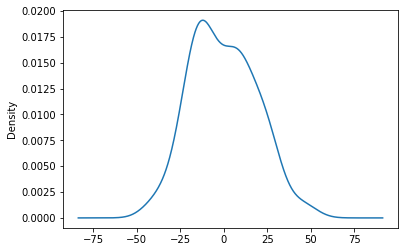

In [ ]:
model_ARIMA_fit.resid.plot(kind = 'kde')

In [ ]:
test_data['Pred_ARIMA'] = pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Pred_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695968
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830814
1956-03-01,317.0,40.0,47.0,50.0,-2.329670
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562175
1956-05-01,318.0,5.0,9.0,48.0,19.310693
1956-06-01,374.0,56.0,51.0,59.0,19.647938
1956-07-01,413.0,39.0,-17.0,49.0,-13.271470
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529638
1956-09-01,355.0,-50.0,-42.0,43.0,4.998660


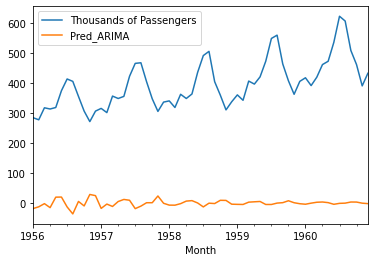

In [ ]:
test_data[['Thousands of Passengers','Pred_ARIMA']].plot()

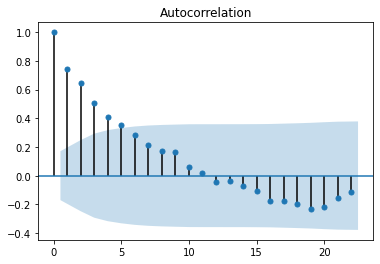

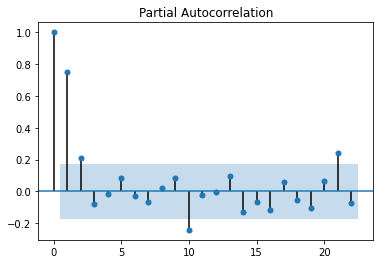

In [ ]:
acf12 = plot_acf(df2['Passengers 12 Difference'].dropna())
pacf12 = plot_pacf(df2['Passengers 12 Difference'].dropna())

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'], order = (3,0,6), seasonal_order = (0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_SARIMA_fit = model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 6)x(0, 1, 0, 12)   Log Likelihood                -265.222
Date:                            Tue, 02 Aug 2022   AIC                            550.443
Time:                                    04:47:37   BIC                            573.210
Sample:                                01-01-1949   HQIC                           559.507
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4732      2.058      0.230      0.818      -3.560       4.506
ar.L2          0.8465      0.343      2.468      0.014       0.174       1.519
ar.L3         -0.3474      1.746     -0.199      0.842      -3.770       3.075
ma.L1          0.3090      2.329      0.133      0.894      -4.256       4.874
ma.L2         -0.4515      1.466     -0.308      0.758      -3.324       2.421
ma.L3         -0.1219      0.428     -0.285      0.776      -0.960       0.716
ma.L4         -0.1594      0.514     -0.310      0.757      -1.167       0.848
ma.L5          0.2263      0.442      0.511      0.609      -0.641       1.093
ma.L6          0.0303      0.306      0.099      0.921      -0.570       0.631
sigma2        87.4208     79.938      1.094      0.274     -69.255     244.097
===================================================================================
Ljung-Box (Q):                       27.13   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.94   Prob(JB):                         0.25
Heteroskedasticity (H):               2.03   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [ ]:
pred_SARIMA = model_SARIMA_fit.predict(start = pred_start_date, end = pred_end_date)

In [ ]:
mape = (np.mean(np.abs(pred_SARIMA - test_data['Thousands of Passengers'])/np.abs(test_data['Thousands of Passengers']))*100).round(2)
rmse = np.sqrt(((pred_SARIMA - test_data['Thousands of Passengers']) ** 2).mean())

print(mape)
print(rmse)

6.73
45.12815101311753


In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
r2_score = r2_score(test_data['Thousands of Passengers'], pred_SARIMA)
print(Mean_Absolute_Error)

0.6822414800599933


In [ ]:
mean_squared_error = mean_squared_error(test_data['Thousands of Passengers'],pred_SARIMA, squared = False)

print(mean_squared_error)

45.12815101311753


In [ ]:
MAE = mean_absolute_error(test_data['Thousands of Passengers'], pred_SARIMA)
print(MAE)

30.798250761408266


In [ ]:
residuals = test_data['Thousands of Passengers'] - pred_SARIMA

In [ ]:
residuals

Month
1956-01-01     -2.297834
1956-02-01     -4.292420
1956-03-01      6.920387
1956-04-01      2.420121
1956-05-01      6.670185
1956-06-01     18.903129
1956-07-01      9.486503
1956-08-01     19.719347
1956-09-01      5.368210
1956-10-01     -4.483839
1956-11-01     -1.819679
1956-12-01     -6.759102
1957-01-01     -5.391680
1957-02-01    -13.404445
1957-03-01     13.467632
1957-04-01      5.879308
1957-05-01     12.777869
1957-06-01     36.860586
1957-07-01     32.078197
1957-08-01     53.105184
1957-09-01     26.371485
1957-10-01      9.263495
1957-11-01      5.526501
1957-12-01     -2.714221
1958-01-01     -5.767755
1958-02-01    -21.123125
1958-03-01     -4.692554
1958-04-01    -17.661291
1958-05-01     -2.225172
1958-06-01     27.442359
1958-07-01     36.176485
1958-08-01     69.756170
1958-09-01      5.518058
1958-10-01      0.932984
1958-11-01     -9.329073
1958-12-01    -21.074588
1959-01-01     -4.673431
1959-02-01    -15.559455
1959-03-01     21.306058
1959-04-01     12.7

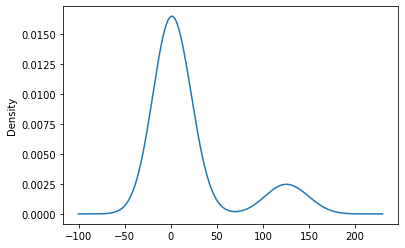

In [ ]:
model_SARIMA_fit.resid.plot(kind = 'kde')

In [ ]:
test_data['Pred_SARIMA'] = pred_SARIMA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Pred_ARIMA,Pred_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.695968,286.297834
1956-02-01,277.0,-7.0,-13.0,44.0,-12.830814,281.292420
1956-03-01,317.0,40.0,47.0,50.0,-2.329670,310.079613
1956-04-01,313.0,-4.0,-44.0,44.0,-15.562175,310.579879
1956-05-01,318.0,5.0,9.0,48.0,19.310693,311.329815
1956-06-01,374.0,56.0,51.0,59.0,19.647938,355.096871
1956-07-01,413.0,39.0,-17.0,49.0,-13.271470,403.513497
1956-08-01,405.0,-8.0,-47.0,58.0,-36.529638,385.280653
1956-09-01,355.0,-50.0,-42.0,43.0,4.998660,349.631790


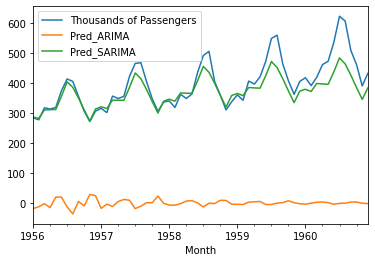

In [ ]:
test_data[['Thousands of Passengers','Pred_ARIMA','Pred_SARIMA']].plot()

AttributeError: ignored

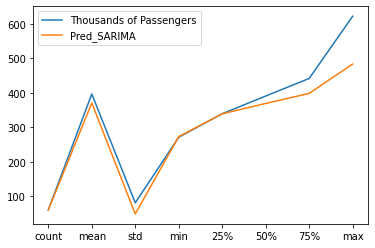

In [ ]:
test_data[['Thousands of Passengers','Pred_SARIMA']].describe().round(2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c6a67e710>,
      dtype=object)

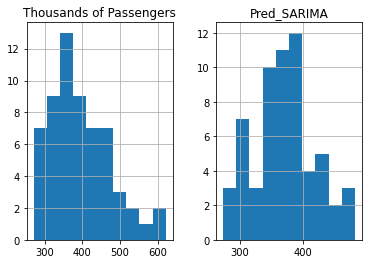

In [ ]:
test_data[['Thousands of Passengers','Pred_SARIMA']].hist()